In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Kaggle 

In [3]:
data = pd.read_csv('multipleChoiceResponses.csv', delimiter = ',',header = 1)
data.head()

/home/mauro/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (157,172,174,210,218,219,246,368,371,384,389,390,391,393) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Which best describes your undergraduate major? - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,Select the title most similar to your current role (or most recent title if retired): - Other - Text,In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice,...,What tools and methods do you use to make your work easy to reproduce? (Select all that apply) - Other - Text,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too expensive,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Too time-consuming,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Requires too much technical knowledge,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Afraid that others will use my work without giving proper credit,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Not enough incentives to share my work,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - I had never considered making my work easier for others to reproduce,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - None of these reasons apply to me,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Selected Choice - Other,What barriers prevent you from making your work even easier to reuse and reproduce? (Select all that apply) - Other - Text
0,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
4,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


## Preliminares
Primero, nos gustaria caracterizar la problacion que respondio las encuentas.

### Paises de residencia, edad y genero

Segun los datos el 80% de las personas que respondieron a la encuesta son hombres y un poco mas de un cuarto de los encuestados tiene entre 25 y 19 años. que residen principalmente en India y Estados Unidos. 

In [4]:
pais = data['In which country do you currently reside?'].value_counts()
edad = data['What is your age (# years)?'].value_counts()
genero = data['What is your gender? - Selected Choice'].value_counts()

In [5]:
#Edades
x = edad.keys()
y = edad.values/sum(edad.values)

Text(0.5,1,'Rangos de edades de los encuestados')

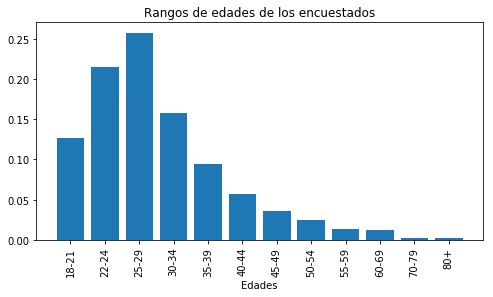

In [6]:
fig = plt.figure(figsize=(8,4))
mybar = plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.xlabel('Edades')
plt.title('Rangos de edades de los encuestados')

In [7]:
#Genero
x = genero.keys()
y = genero.values/sum(genero.values)

Text(0.5,1,'Genero de los encuestados')

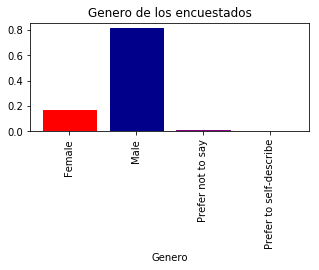

In [8]:
fig = plt.figure(figsize=(5,2))
mybar = plt.bar(x, y)
mybar[0].set_color('darkblue')
mybar[1].set_color('r')
mybar[2].set_color('purple')
plt.xticks(rotation='vertical')
plt.xlabel('Genero')
plt.title('Genero de los encuestados')

In [9]:
#Pais de residencia
x = pais.keys()
y = pais.values/sum(pais.values)

Text(0.5,1,'Pais de residencia de los encuestados de los encuestados')

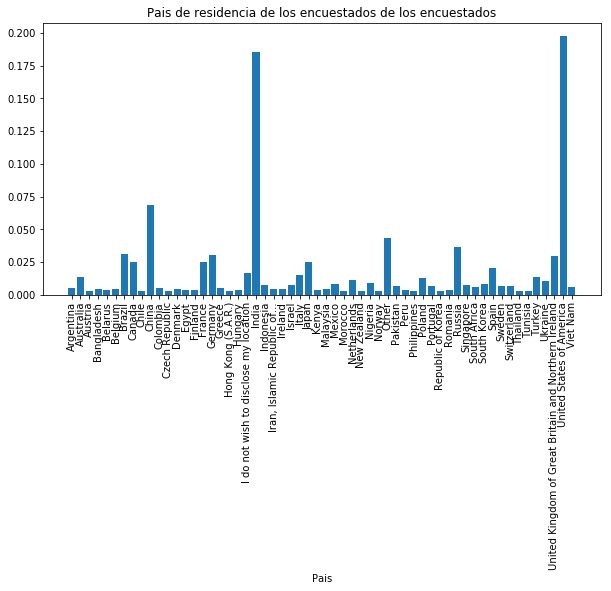

In [10]:
fig = plt.figure(figsize=(10,5))
mybar = plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.xlabel('Pais')
plt.title('Pais de residencia de los encuestados de los encuestados')

### Ocupacion 
Segun los datos, las personas encuestadas se dedican principalmente a:
Student, Data Scientist, Software Engineer, Data Analyst

In [11]:
ocupacion = data['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()
x = ocupacion.keys()
y = ocupacion.values/sum(ocupacion.values)

Text(0.5,1,'Ocupacion de los encuestados')

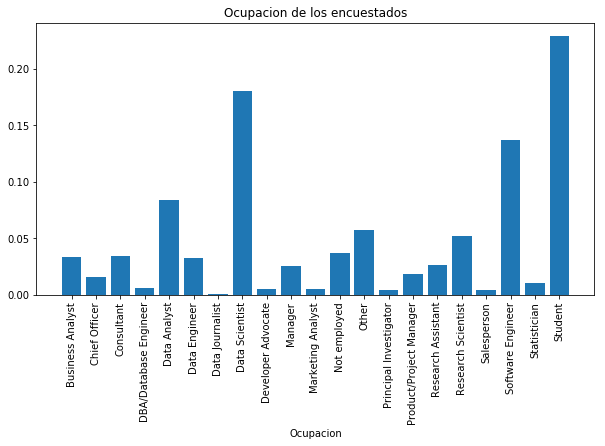

In [12]:
fig = plt.figure(figsize=(10,5))
mybar = plt.bar(x, y)
plt.xticks(rotation='vertical')
plt.xlabel('Ocupacion')
plt.title('Ocupacion de los encuestados')

## Modelos - Target: Ocupacion
Se busca aplicar Random Forest para obtener los features que mejor predicen la segunda ocupacion mas comun, Data Scientist, entre las personas encuestadas y utilizando f1score para decidir cual de los modelos logra predecir mejor el target.

Utilizando dummies se crean nuevas columnas donde los valores categoricos son reemplazados por variables binarias, ya que por cada valor que tome la variable se crea una nueva columna.

In [13]:
data['target'] = list(map(lambda x: 1 if x=='Data Scientist' else 0, data['Select the title most similar to your current role (or most recent title if retired): - Selected Choice']))

In [14]:
#Features
dummies = pd.get_dummies(data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'],
                         prefix='What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
data = pd.concat([data,dummies],axis=1)
data = data.drop('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
                axis=1)

dummies1 = pd.get_dummies(data['What is your age (# years)?'],
                         prefix='What is your age (# years)?')
data = pd.concat([data,dummies1],axis=1)
data = data.drop('What is your age (# years)?',
                axis=1)

dummies2 = pd.get_dummies(data['Which best describes your undergraduate major? - Selected Choice'],
                         prefix='Which best describes your undergraduate major? - Selected Choice')
data = pd.concat([data,dummies2],axis=1)
data = data.drop('Which best describes your undergraduate major? - Selected Choice',
                axis=1)

dummies3 = pd.get_dummies(data['In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice'],
                         prefix='In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
data = pd.concat([data,dummies3],axis=1)
data = data.drop('In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice',
                axis=1)

dummies4 = pd.get_dummies(data['What is your current yearly compensation (approximate $USD)?'],
                         prefix='What is your current yearly compensation (approximate $USD)?')
data = pd.concat([data,dummies4],axis=1)
data = data.drop('What is your current yearly compensation (approximate $USD)?',
                axis=1)


In [35]:
features = data.columns[-70:]
# print(features)

In [36]:

all_train, all_test = train_test_split(data,test_size= 0.25)
rf = RandomForestClassifier(n_estimators=500)
rf.fit(all_train[features], all_train.target)
rf_predict = rf.predict(all_test[features])
rf_f1 = f1_score(all_test.target, rf_predict)


In [37]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

Text(0.5,0,'Feature')

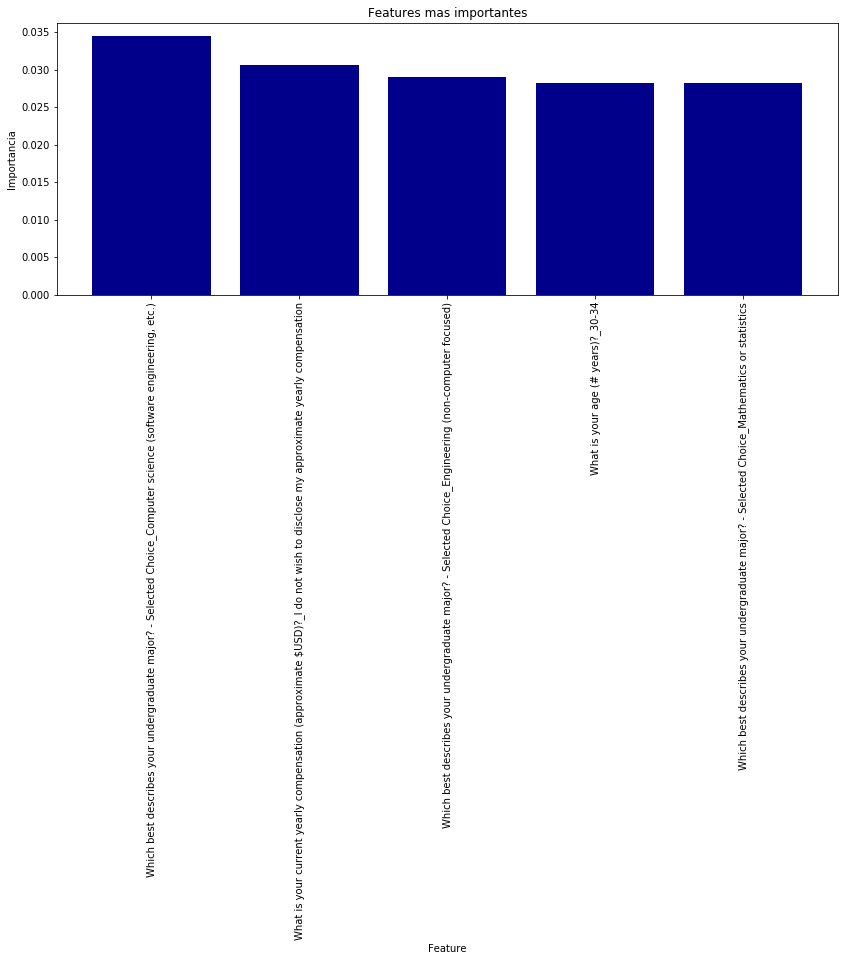

In [42]:
X = data[features]

fig = plt.figure(figsize = (14,5))
plt.title("Features mas importantes")
plt.bar(range(X.shape[1])[:5], importances[indices][:5],
        align="center",color ='darkblue')
plt.xticks(range(X.shape[1])[:5], features[indices],rotation='vertical')
plt.ylabel('Importancia')
plt.xlabel('Feature')

Según lo anterior, para determinar si una persona es o no un Data Scientist, son importantes los criterios que se muestan en la gráfica de arriba. 

El primero y el tercero de ellos son esperados, pero el criterio de la edad es inesperado pero podría deberse al boom del data science que ocurrió hace poco. 

Además de esto, es curioso que a pesar de dedicarse a data science, no quieran compartir cierta información como sus ganancias. 

Por otro lado, dado el rigor matemático que exige dedicarse a data science, tiene sentido el quinto de los criterios. 